In [1]:
import pickle
from erpe.analysis import *
from erpe.experiment_design import *
from erpe.models import *
from erpe.qcal_util import *
from erpe.lqr import *

In [2]:
import pandas

In [3]:
# save an empty dataframe in a csv
data = [{   
        'qid' : 0, 
        'timestamp': 0,
        'ramsey_estimate' : 0,
        'overrot' : 0,
        'axis' : 0, 
        'T1': 0,
        'T2': 0,
        }]
# add the data to the dataframe
df = pandas.DataFrame(data)
filename = 'drift_characterization_experiments/weekend_nov8/single_qb_data.csv'


df.to_csv(filename)

data_2qb = [{   
        'timestamp': 0,
        'qids' : 0, 
        'ZZ' : 0,
        'IZ' : 0,
        'ZI' :0
        }]
filename = 'drift_characterization_experiments/weekend_nov8/two_qb_data.csv'
df_2qb = pandas.DataFrame(data_2qb)

df_2qb.to_csv(filename)



In [4]:
# load a pickle file
with open('drift_characterization_experiments/nov6_2024/Q1_ramsey_1730933516.008186.pkl', 'rb') as f:
    pickle_data = pickle.load(f)

In [5]:
import os

def list_files_in_directory(directory):
  """Lists all files in the specified directory.

  Args:
    directory: The path to the directory.

  Returns:
    A list of filenames in the directory.
  """
  try:
    return os.listdir(directory)
  except FileNotFoundError:
    print(f"Directory not found: {directory}")
    return []

In [6]:
filenames = list_files_in_directory('drift_characterization_experiments/nov6_2024/')

# separate each filename by '_'
file_parts = [filename.split('_') for filename in filenames]

In [7]:
oneqb_fileparts = [filepart for filepart in file_parts if len(filepart) == 3]
twqb_fileparts = [filepart for filepart in file_parts if len(filepart) == 4]

In [8]:
q0_fileparts = [filepart for filepart in oneqb_fileparts if filepart[0] == 'Q0']
q1_fileparts = [filepart for filepart in oneqb_fileparts if filepart[0] == 'Q1']
q2_fileparts = [filepart for filepart in oneqb_fileparts if filepart[0] == 'Q2']
q0q1_fileparts = [filepart for filepart in twqb_fileparts if filepart[0] == 'Q0']
q1q2_fileparts = [filepart for filepart in twqb_fileparts if filepart[0] == 'Q1']


In [9]:
q0_ramsey_fileparts = [filepart for filepart in q0_fileparts if filepart[1] == 'ramsey']
q0_xgate_fileparts = [filepart for filepart in q0_fileparts if filepart[1] == 'xgate']
q1_ramsey_fileparts = [filepart for filepart in q1_fileparts if filepart[1] == 'ramsey']
q1_xgate_fileparts = [filepart for filepart in q1_fileparts if filepart[1] == 'xgate']
q2_ramsey_fileparts = [filepart for filepart in q2_fileparts if filepart[1] == 'ramsey']
q2_xgate_fileparts = [filepart for filepart in q2_fileparts if filepart[1] == 'xgate']

In [10]:
q1_ramsey_fileparts

[['Q1', 'ramsey', '1730943575.1802137.txt'],
 ['Q1', 'ramsey', '1730933866.1390214.txt'],
 ['Q1', 'ramsey', '1730940971.9304674.txt'],
 ['Q1', 'ramsey', '1730940117.695792.pkl'],
 ['Q1', 'ramsey', '1730943575.1802137.pkl'],
 ['Q1', 'ramsey', '1730937331.3019123.pkl'],
 ['Q1', 'ramsey', '1730942709.0686274.txt'],
 ['Q1', 'ramsey', '1730935618.8817308.txt'],
 ['Q1', 'ramsey', '1730937331.3019123.txt'],
 ['Q1', 'ramsey', '1730942709.0686274.pkl'],
 ['Q1', 'ramsey', '1730936493.7060065.pkl'],
 ['Q1', 'ramsey', '1730945275.7906563.txt'],
 ['Q1', 'ramsey', '1730934734.3795028.txt'],
 ['Q1', 'ramsey', '1730944439.9778666.pkl'],
 ['Q1', 'ramsey', '1730935618.8817308.pkl'],
 ['Q1', 'ramsey', '1730933516.008186.txt'],
 ['Q1', 'ramsey', '1730945275.7906563.pkl'],
 ['Q1', 'ramsey', '1730938229.8286526.pkl'],
 ['Q1', 'ramsey', '1730938229.8286526.txt'],
 ['Q1', 'ramsey', '1730939249.7845938.txt'],
 ['Q1', 'ramsey', '1730933516.008186.pkl'],
 ['Q1', 'ramsey', '1730941840.0100684.txt'],
 ['Q1', 'rams

In [11]:
# remove the txt files from the list
q0_ramsey_fileparts = [filepart for filepart in q0_ramsey_fileparts if filepart[2].split('.')[2] == 'pkl']
q0_xgate_fileparts = [filepart for filepart in q0_xgate_fileparts if filepart[2].split('.')[2] == 'pkl']
q1_ramsey_fileparts = [filepart for filepart in q1_ramsey_fileparts if filepart[2].split('.')[2] == 'pkl']
q1_xgate_fileparts = [filepart for filepart in q1_xgate_fileparts if filepart[2].split('.')[2] == 'pkl']
q2_ramsey_fileparts = [filepart for filepart in q2_ramsey_fileparts if filepart[2].split('.')[2] == 'pkl']
q2_xgate_fileparts = [filepart for filepart in q2_xgate_fileparts if filepart[2].split('.')[2] == 'pkl']


In [12]:
q1_ramsey_fileparts

[['Q1', 'ramsey', '1730940117.695792.pkl'],
 ['Q1', 'ramsey', '1730943575.1802137.pkl'],
 ['Q1', 'ramsey', '1730937331.3019123.pkl'],
 ['Q1', 'ramsey', '1730942709.0686274.pkl'],
 ['Q1', 'ramsey', '1730936493.7060065.pkl'],
 ['Q1', 'ramsey', '1730944439.9778666.pkl'],
 ['Q1', 'ramsey', '1730935618.8817308.pkl'],
 ['Q1', 'ramsey', '1730945275.7906563.pkl'],
 ['Q1', 'ramsey', '1730938229.8286526.pkl'],
 ['Q1', 'ramsey', '1730933516.008186.pkl'],
 ['Q1', 'ramsey', '1730941840.0100684.pkl'],
 ['Q1', 'ramsey', '1730940971.9304674.pkl'],
 ['Q1', 'ramsey', '1730934734.3795028.pkl'],
 ['Q1', 'ramsey', '1730933866.1390214.pkl'],
 ['Q1', 'ramsey', '1730939249.7845938.pkl']]

In [13]:
file_parts[1][2].split('.')[2]

'txt'

In [14]:
q0_ramsey_analyses = []
for filepart in q0_ramsey_fileparts:
    timestamp = filepart[2][:-4]
    filename = '_'.join(filepart)
    with open('drift_characterization_experiments/nov6_2024/' + filename, 'rb') as f:
        q0_ramsey_analyses.append((timestamp, pickle.load(f)))

q1_ramsey_analyses = []
for filepart in q1_ramsey_fileparts:
    timestamp = filepart[2][:-4]
    filename = '_'.join(filepart)
    with open('drift_characterization_experiments/nov6_2024/' + filename, 'rb') as f:
        q1_ramsey_analyses.append((timestamp, pickle.load(f)))

In [15]:
q0_ramsey_analyses

[('1730936465.7285192', <erpe.analysis.Analysis_Ramsey at 0x78045a56f690>),
 ('1730945255.095001', <erpe.analysis.Analysis_Ramsey at 0x78045a045b10>),
 ('1730942688.3045979', <erpe.analysis.Analysis_Ramsey at 0x78045b3b0490>),
 ('1730933495.2756128', <erpe.analysis.Analysis_Ramsey at 0x780459fcb550>),
 ('1730933845.4435594', <erpe.analysis.Analysis_Ramsey at 0x7804d8107a50>),
 ('1730937310.591419', <erpe.analysis.Analysis_Ramsey at 0x78045a0a10d0>),
 ('1730940097.0061007', <erpe.analysis.Analysis_Ramsey at 0x78045a18edd0>),
 ('1730934713.677573', <erpe.analysis.Analysis_Ramsey at 0x78045a8b22d0>),
 ('1730941819.2536454', <erpe.analysis.Analysis_Ramsey at 0x78045a2267d0>),
 ('1730943548.4000564', <erpe.analysis.Analysis_Ramsey at 0x78045a069250>),
 ('1730944415.9546893', <erpe.analysis.Analysis_Ramsey at 0x78045a1e0850>),
 ('1730938180.0391963', <erpe.analysis.Analysis_Ramsey at 0x7804d80efa90>),
 ('1730935598.1906843', <erpe.analysis.Analysis_Ramsey at 0x78045a06bd10>),
 ('1730939229.0

In [16]:
q0_ramsey_analyses[0][1].estimates

{'idle': -0.00012782361021690392}

In [17]:
q0_ramsey_estimates = np.array([(timestamp, float(analysis.estimates['idle'])) for timestamp, analysis in q0_ramsey_analyses], dtype=float).T

In [18]:
q0_ramsey_estimates

array([[ 1.73093647e+09,  1.73094526e+09,  1.73094269e+09,
         1.73093350e+09,  1.73093385e+09,  1.73093731e+09,
         1.73094010e+09,  1.73093471e+09,  1.73094182e+09,
         1.73094355e+09,  1.73094442e+09,  1.73093818e+09,
         1.73093560e+09,  1.73093923e+09,  1.73094095e+09],
       [-1.27823610e-04, -4.37849645e-04, -1.32670098e-04,
        -1.30961921e-04, -2.15807529e-04, -2.20811449e-04,
        -1.54643712e-04, -1.68327974e-04, -2.36823573e-04,
        -2.48692133e-04, -3.31716637e-04, -1.64211680e-04,
        -2.37364953e-04, -2.60394584e-04, -1.90630457e-04]])

In [25]:
depths_ramsey = [2**i for i in range(12)]
num_shots = 1000

def estimate_rpe_sigma(num_shots, max_depth):
    return np.pi/(max_depth*np.sqrt(num_shots))

print(estimate_rpe_sigma(num_shots, depths_ramsey[-1]))

4.850873176658253e-05


Text(0, 0.5, 'Estimated RPE phase [rad]')

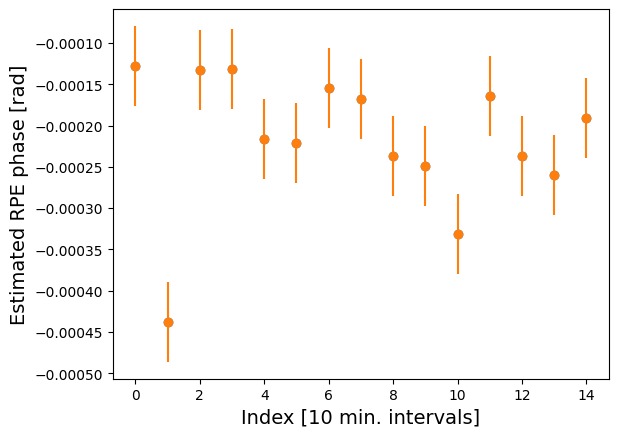

In [37]:
plt.plot(range(len(q0_ramsey_estimates[1])), q0_ramsey_estimates[1], 'o')
# add error bars based on estimated sigma
sigma = estimate_rpe_sigma(num_shots, depths_ramsey[-1])
plt.errorbar(range(len(q0_ramsey_estimates[1])), q0_ramsey_estimates[1], yerr=sigma, fmt='o')

# add axis labels
plt.xlabel('Index [10 min. intervals]', fontsize=14)
plt.ylabel('Estimated RPE phase [rad]', fontsize=14)


/home/jpmarceaux/anaconda3/envs/qcal/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:589: UserWarning:

nperseg = 256 is greater than input length  = 15, using nperseg = 15



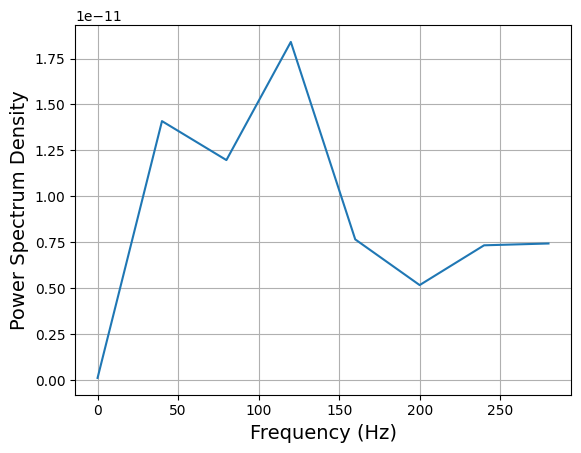

In [38]:
# calculate PSD
import matplotlib.pyplot as plt
from scipy import signal

dt = 1/600
# Calculate the sampling frequency (fs)
fs = 1/dt  

# Calculate the PSD using Welch's method
frequencies, psd = signal.welch(q0_ramsey_estimates[1], fs=fs)


plt.figure()
plt.plot(frequencies, psd)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Power Spectrum Density', fontsize=14)
plt.grid(True)
plt.show()

In [20]:
q1_ramsey_estimates = np.array([(timestamp, float(analysis.estimates['idle'])) for timestamp, analysis in q1_ramsey_analyses], dtype=float).T

In [108]:
q1_ramsey_estimates

array([[1.73094012e+09, 1.73094358e+09, 1.73093733e+09, 1.73094271e+09,
        1.73093649e+09, 1.73094444e+09, 1.73093562e+09, 1.73094528e+09,
        1.73093823e+09, 1.73093352e+09, 1.73094184e+09, 1.73094097e+09,
        1.73093473e+09, 1.73093387e+09, 1.73093925e+09],
       [2.75770689e-03, 2.57409049e-03, 1.88540637e-03, 1.97197427e-03,
        2.18936753e-03, 1.79901940e-03, 2.35955087e-03, 9.87081318e-04,
        2.60284845e-03, 2.03812414e-03, 1.89243347e-03, 1.86714427e-03,
        1.91460379e-03, 1.86997597e-03, 2.26569714e-03]])

In [109]:
q1_ramsey_estimates[1]

array([0.00275771, 0.00257409, 0.00188541, 0.00197197, 0.00218937,
       0.00179902, 0.00235955, 0.00098708, 0.00260285, 0.00203812,
       0.00189243, 0.00186714, 0.0019146 , 0.00186998, 0.0022657 ])

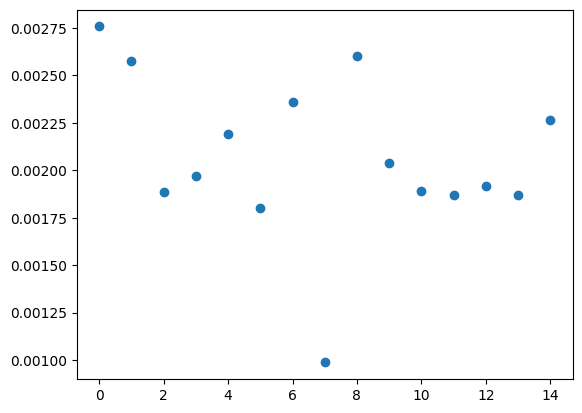

In [110]:
plt.plot(q1_ramsey_estimates[1], 'o')